<a href="https://colab.research.google.com/github/Atta-UR/Image_Classification_on_Cifar10_Dataset/blob/main/Image_Classification_Using_Cifar10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries Including the Dataset

In [28]:
# Importing TensorFlow and Keras libraries for building and training neural networks
import tensorflow as tf
from tensorflow.keras.datasets import cifar10  # CIFAR-10 dataset for image classification
from tensorflow.keras.models import Sequential  # Sequential model for stacking layers linearly
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization  # Layers for CNN construction
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation
from tensorflow.keras.layers import Input  # Import the Input layer
from tensorflow.keras.optimizers import Adamax

# Libraries for data visualization and numerical operations
import matplotlib.pyplot as plt  # Used to visualize training progress and augmented images
import numpy as np  # Essential for numerical operations and array manipulation


# Load and Preprocess the CIFAR-10 Data

In [29]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Data Augmentation

In [30]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

# Visualize Sample Augmented Images

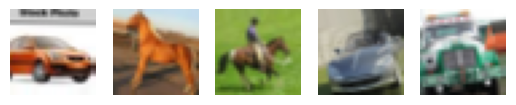

In [31]:
# Display augmented images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=5):
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()
    break  # Display one batch and stop

# Define the CNN Model

In [32]:
# Define the CNN model architecture with 10 Conv2D layers
model = Sequential([
    Input(shape=(32, 32, 3)),                      # Explicitly define the input shape

    # Block 1: 2 Conv2D layers + BatchNormalization + MaxPooling + Dropout
    Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2: 2 Conv2D layers + BatchNormalization + MaxPooling + Dropout
    Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3: 2 Conv2D layers + BatchNormalization + MaxPooling + Dropout
    Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4: 2 Conv2D layers + BatchNormalization + MaxPooling + Dropout
    Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 5: 2 Conv2D layers (10th Conv2D added here) + BatchNormalization + MaxPooling + Dropout
    Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fully connected layers
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compiling the Model

In [33]:
# Compile model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model

In [34]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1),              # Stop if no improvement
    ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, verbose=1)                          # Reduce learning rate
]

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),  # Training data with augmentation
    epochs=50,
    validation_data=(x_test, y_test),              # Validation data
    callbacks=callbacks                            # Add callbacks
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 66ms/step - accuracy: 0.2465 - loss: 21.8804 - val_accuracy: 0.3730 - val_loss: 11.4264 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.4325 - loss: 9.2993 - val_accuracy: 0.3361 - val_loss: 5.8255 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.5142 - loss: 4.0736 - val_accuracy: 0.3612 - val_loss: 3.5535 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - accuracy: 0.5597 - loss: 2.4276 - val_accuracy: 0.5602 - val_loss: 2.0947 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.6088 - loss: 1.9324 - val_accuracy: 0.6625 - val_loss: 1.6849 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.6397 - loss: 1.7458 - val_accuracy: 0.6489 - val_loss: 1.6779 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.6693 -

# Visualize Training History

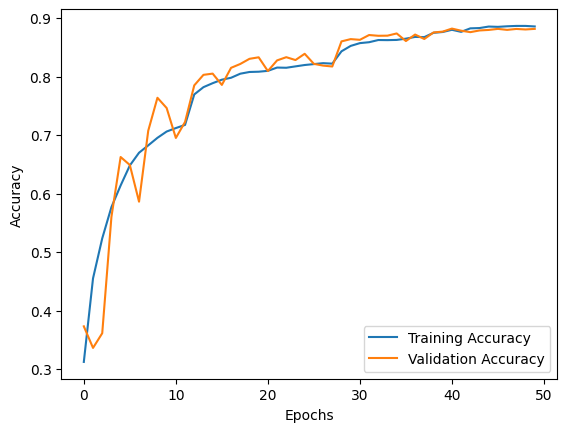

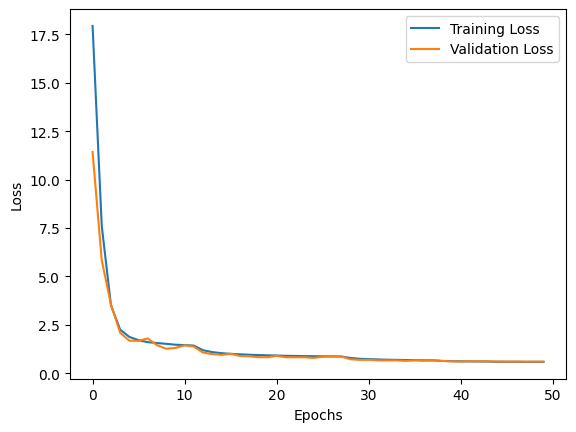

In [35]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
